# Titanic Survival Prediction Using Pipeline

In [173]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

In [174]:
df = pd.read_csv('Titanic dataset.csv')

In [175]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [176]:
df.shape

(891, 12)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [178]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [179]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

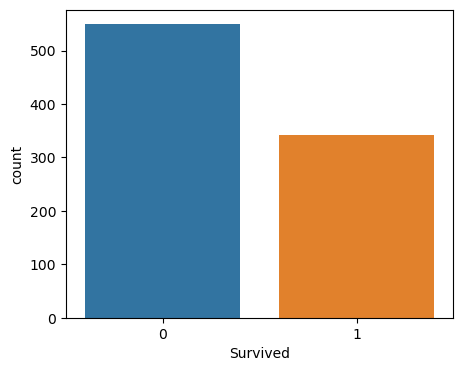

In [180]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Survived')

<Axes: ylabel='count'>

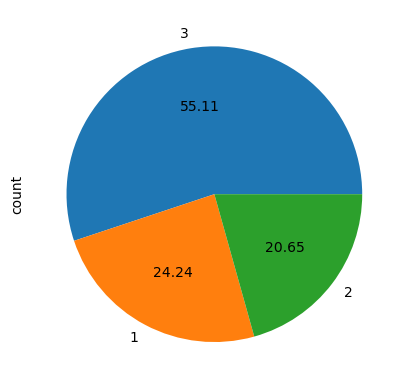

In [181]:
df.Pclass.value_counts().plot(kind='pie', autopct='%.2f')

<Axes: xlabel='Sex'>

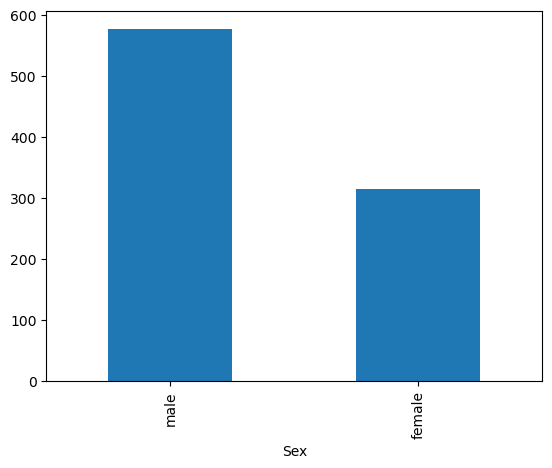

In [182]:
df.Sex.value_counts().plot(kind='bar')

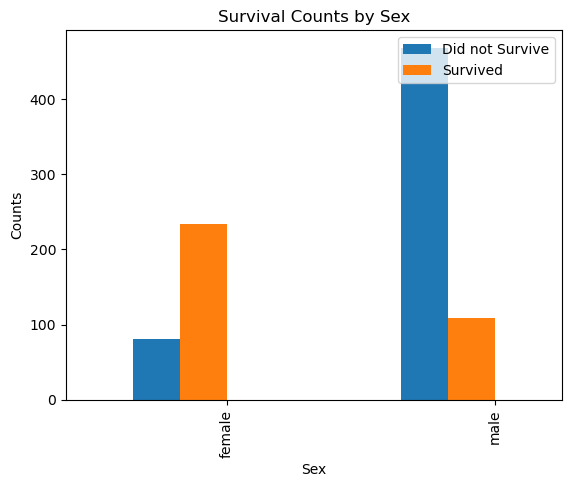

In [183]:
sex_survived_counts = df.groupby(['Sex', 'Survived']).size().unstack()

# Plotting the bar graph side by side
ax = sex_survived_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], width=0.35, position=1, align='center')

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.title('Survival Counts by Sex')
plt.legend(['Did not Survive', 'Survived'], loc='upper right')

# Display the plot
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

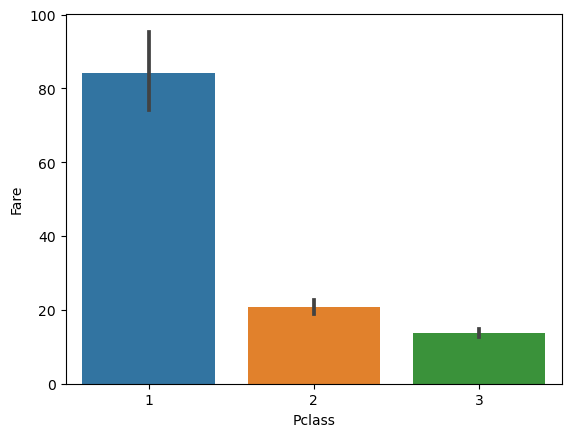

In [184]:
sns.barplot(data=df, x='Pclass', y='Fare')

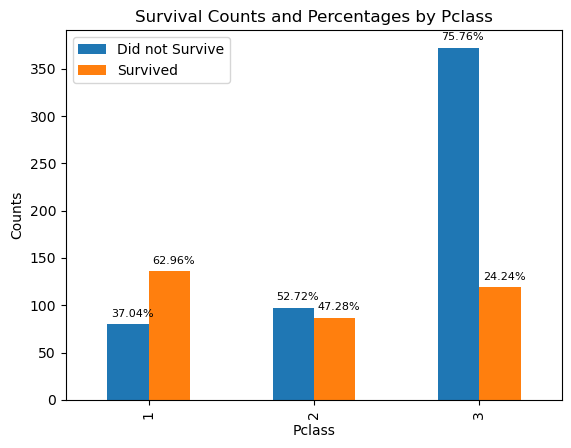

In [185]:
# Assuming you have loaded the Titanic dataset into a DataFrame called 'df'
# You can adjust this line based on your actual dataset loading process
# For example, you might use something like: df = pd.read_csv('titanic.csv')

# Assuming your DataFrame has columns 'Pclass' and 'Survived'
# You can adjust these column names based on your actual dataset
class_survived_counts = df.groupby(['Pclass', 'Survived']).size().unstack()

# Calculate survival percentages for each class
class_survived_percentages = class_survived_counts.div(class_survived_counts.sum(axis=1), axis=0) * 100

# Plotting the bar graph for counts
ax = class_survived_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Pclass')
plt.ylabel('Counts')
plt.title('Survival Counts and Percentages by Pclass')
plt.legend(['Did not Survive', 'Survived'], loc='upper left')

# Annotate percentages on top of each bar
k=0
for i, col in enumerate(class_survived_counts.columns):
    for j, value in enumerate(class_survived_counts[col]):
        percentage = f'{class_survived_percentages[col].iloc[j]:.2f}%'
        ax.text(j-0.1+k, value + 6, percentage,  ha='center', va='bottom', fontsize=8)
    k=0.25
         
# Display the plot
plt.show()


In [186]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [187]:
columns_to_remove = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(columns=columns_to_remove, inplace=True)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.20, random_state=1)

In [189]:
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
301,3,male,NaN,2,0,23.2500,Q
309,1,female,30.0,0,0,56.9292,C


In [190]:
y_train.head(2)

301    1
309    1
Name: Survived, dtype: int64

In [191]:
trf1 = ColumnTransformer(
    [
        ('Impute_age', SimpleImputer(), [2]),
        ('Impute_embarked', SimpleImputer(strategy='most_frequent'), [6])
    ], remainder='passthrough'
)

In [192]:
trf2 = ColumnTransformer(
    [
        ('ohe_sex_embarked', OneHotEncoder(sparse=False, handle_unknown='ignore'), [1, 6])
    ],
    remainder='passthrough'
)

In [193]:
trf3 = ColumnTransformer(
    [
        ('Standard_scalar', StandardScaler(), slice(0,10))
    ]
)

In [194]:
# trf4 = SelectKBest(score_func=chi2,k=8)

In [195]:
from sklearn.svm import SVC
trf5 = SVC()

In [196]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf5', trf5)
])

In [197]:
pipe.fit(X_train, y_train)

C:\Users\masan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('Impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('Standard_scalar',
                                                  StandardScaler(),
                                                  slice(0, 10, None))])),
                ('trf5', SVC())])

In [198]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('Impute_age', SimpleImputer(), [2]),
                                 ('Impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [1, 6])]),
 'trf3': ColumnTransformer(transformers=[('Standard_scalar', StandardScaler(),
                                  slice(0, 10, None))]),
 'trf5': SVC()}

In [199]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [200]:
y_pred = pipe.predict(X_test)

In [201]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [202]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6201117318435754

In [203]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

C:\Users\masan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\masan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\masan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\masan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

0.6404510981975771